# Parametric LR for Binary Classification

In [67]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from IPython import display as dp
import sympy as sym
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

"""
Binary classification with PyTorch ANN.

Creates two 2D Gaussian clusters (class A at (1,1), class B at (5,1)) and trains
a small feedforward net (2→1→1 with ReLU and Sigmoid) to classify points by color.
Uses BCE loss and a 0.5 threshold to assign predicted labels.

Components:
- Data: 100 points per class, blurred by a configurable factor
- Model: Linear(2,1) → ReLU → Linear(1,1) → Sigmoid
- Loss: BCELoss
- Output: probability of class 1; predlabels = predictions > 0.5
- Accuracy: 100 - 100*len(misclassified)/(2*nPerClust)
"""

'\nBinary classification with PyTorch ANN.\n\nCreates two 2D Gaussian clusters (class A at (1,1), class B at (5,1)) and trains\na small feedforward net (2→1→1 with ReLU and Sigmoid) to classify points by color.\nUses BCE loss and a 0.5 threshold to assign predicted labels.\n\nComponents:\n- Data: 100 points per class, blurred by a configurable factor\n- Model: Linear(2,1) → ReLU → Linear(1,1) → Sigmoid\n- Loss: BCELoss\n- Output: probability of class 1; predlabels = predictions > 0.5\n- Accuracy: 100 - 100*len(misclassified)/(2*nPerClust)\n'

## Generating Data Function

In [68]:
def generate_data(nPerClust = 100, blur = 1, show_graph = True):

  """
  Creates two 2D Gaussian clusters (class A at (1,1), class B at (5,1)) to be fed
  as input to a small feedforward net (2→1→1 with ReLU and Sigmoid) to classify
  points by color.

  Parameters:
  - nPerClust (int): Number of points per class. Default is 100.
  - blur (float): How spread out the data will be. Default is 1.
  - show (bool): Whether to show the plot. Default is True.

  Returns: data, labels
  """

  # Creating The Data:
  n = nPerClust
  br = blur        # How spread out the data will be
  A = [1, 1]      # Centering Data A around coord- (1,1)
  B = [5, 1]      # Centering Data B around coord- (5,1)

  # Generating Data:
  # 'a' and 'b' are lists of 2 arrays. One for abscissa and another for ordinate
  # The coordinates are randomly scattered by the factor "blur"
  a = [A[0]+np.random.randn(n)*br, A[1]+np.random.randn(n)*br]
  b = [B[0]+np.random.randn(n)*br, B[1]+np.random.randn(n)*br]

  # True Labels
  # Vertically stacking data labels fo A and B
  labels_np = np.vstack((np.zeros((n, 1)), np.ones((n, 1))))

  # Concatanate into a Matrix:
  # A 200x2 matrix is generated. Col 1 abscissa and Col 2 ordinate
  # 0:99 Data "a" // 100:199 Data "b"
  data_np= np.hstack((a, b)).T

  # Convert to Tensors:
  data = torch.tensor(data_np).float()
  labels = torch.tensor(labels_np).float()

  # Showing the true data:
  fig = plt.figure(figsize=(5, 5))

  # Plotting the first 100 points as blue squares in the left half of the plane:
  plt.plot(data[np.where(labels==0)[0],0], data[np.where(labels==0)[0],1],'bs')

  # Plotting the second 100 points as black circles in the right half of the plane:
  plt.plot(data[np.where(labels==1)[0],0], data[np.where(labels==1)[0],1],'ko')
  if show_graph:
    plt.title('Data')
    plt.xlabel('dim 1')
    plt.ylabel('dim 2')
    plt.show()

  return data, labels

## Model Function

In [75]:
def model(data, learningRate, hidden_units = 1):

  # Building the Model
  data = data.float()
  h = hidden_units

  ANNclassify = nn.Sequential(
      nn.Linear(2, h),     # Input layer (2 input, 1 output)
      nn.ReLU(),           # Activation Function
      nn.Linear(h, 1),     # Output Unit
      #nn.Sigmoid()         # Final Activation Unit (Won't be needed \
                            # if BCEWithLogitsLoss is used)
  )

  ANNclassify

  # Learning Rate
  learningRate = learningRate

  # Loss Function
  lossFunction = nn.BCEWithLogitsLoss()       # Binary Cross Entropy loss

  # Optimizer (Implementing Gradient Descent)
  optimizer = torch.optim.SGD(ANNclassify.parameters(), lr = learningRate)


  return ANNclassify, lossFunction, optimizer

## Model Trainer Function

In [78]:
def train_model(ANNclassify, lossFunction, optimizer, data, labels, \
                numepochs = 1000, show_graph=False, print_accuracy = False):

  # Training The Model:
  numepochs = numepochs
  ann = ANNclassify
  data = data.float()
  labels = labels.float()
  losses = torch.zeros(numepochs)

  for epochi in range(numepochs):

    # Forward pass
    y_hat = ann(data)

    # Computing the loss
    loss = lossFunction(y_hat, labels)
    losses[epochi] = loss

    # Backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


  # Computing Predictions:
  predictions = ANNclassify(data)     # Result of BCEWL function y_hat


  # Total Accuracy:
  totalacc = 100*torch.mean(((predictions > 0)==labels).float())

  if show_graph:
      # Plotting the Losses:
      plt.plot(losses.detach(), 'o', markerfacecolor='w', linewidth=.1)
      plt.plot(epochi, losses[-1].detach(), 'o', markerfacecolor='r', markersize=7)
      plt.xlabel('Epochs')
      plt.ylabel('Loss')
      plt.title(f'Losses over Epochs, Final Accuracy {totalacc}%')
      plt.show()

  # Report Accuracy:
  if print_accuracy:
    print(f'Accuracy: {totalacc}%')
  return losses, predictions, totalacc

## Code Test With 1 Iteration:

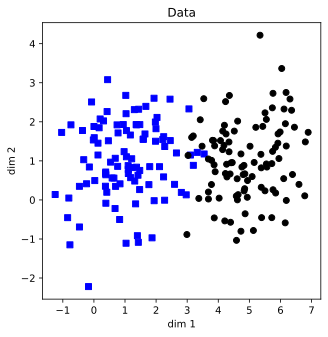

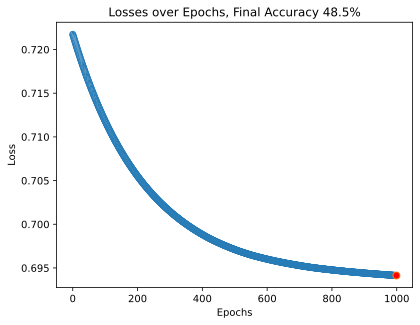

In [79]:
# Generating The Data:
data, labels = generate_data(show_graph=True)

# Initializing The Model:
ANNclassify, lossFunction, optimizer = model(data, learningRate=0.01, hidden_units = 1)

# Training The Model:
losses, predictions, totalacc = train_model(ANNclassify, lossFunction,\
                                            optimizer, data, labels,\
                                            numepochs=1000, show_graph=True)

## Experimenting The Model for Variable Learning Rates

/tmp/ipython-input-4107837559.py:21: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  allLosses[i,:] = losses.detach()


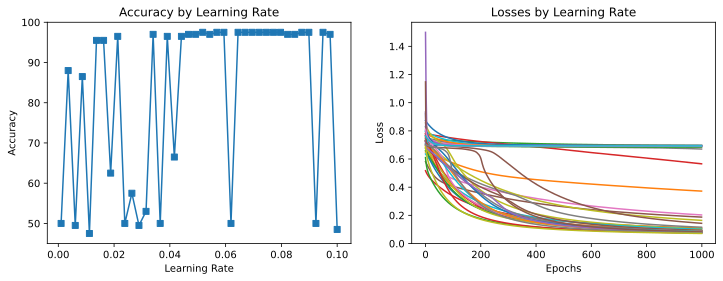

In [81]:
# Setting Learning Rates
learningrates = np.linspace(0.001, 0.1, 40)
numepochs = 1000

# Initializing Results
accByLr = []        # Accuracy per Learning Rate
allLosses = np.zeros((len(learningrates), numepochs))

# Running The Experiment
for i,lr in enumerate(learningrates):

  # Initializing The Model:
  ANNclassify, lossFunction, optimizer = model(data, lr, hidden_units = 1)

  # Train The Model:
  losses, predictions, totalacc = train_model(ANNclassify,lossFunction, \
                                              optimizer, data, labels, numepochs,\
                                              show_graph=False)

  # Storing All Results
  allLosses[i,:] = losses.detach()
  accByLr.append(totalacc)

# Plot the Labeled Data:
fig, ax = plt.subplots(1,2, figsize=(12,4))

ax[0].plot(learningrates, accByLr, 's-')
ax[0].set_xlabel('Learning Rate')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Accuracy by Learning Rate')

ax[1].plot(allLosses.T)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].set_title('Losses by Learning Rate')
plt.show()

In [83]:
# Proportion of runs where accuracy exceeded 70%
sum(torch.tensor(accByLr) > 70)/len(accByLr)

tensor(0.6750)

## Meta-Experiment
Running a Meta-Experiment on the previous one conducted 50 times

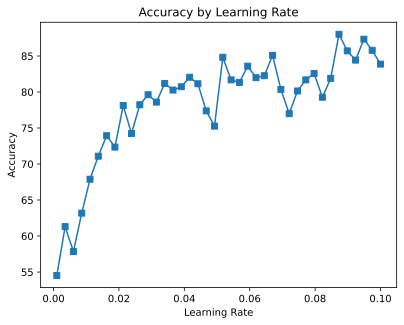

In [84]:
# Setting up outer loop.
numepochs = 500
meta_j = 50
learningrates = np.linspace(0.001, 0.1, 40)   # Setting Learning Rates

accMeta = np.zeros((meta_j, len(learningrates)))


for j in range(meta_j):

  # Running The Experiment
  for i,lr in enumerate(learningrates):

    # Initializing The Model:
    ANNclassify, lossFunction, optimizer = model(data, lr, hidden_units = 1)

    # Train The Model:
    losses, predictions, totalacc = train_model(ANNclassify, lossFunction, \
                                                optimizer, data, labels,\
                                                numepochs, show_graph=False)

    # Storing All Results
    accMeta[j,i] = totalacc


# Plotting The Results Averaged over experiments
plt.plot(learningrates, np.mean(accMeta, axis=0), 's-') # Avrage of acc along each column
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Accuracy by Learning Rate')
plt.show()

## Mega-Meta Experiment
Expanding on Meta-experiments by looping through different hiddent units values.
-  **NOTE** The code takes ~20 mins

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

for h in [1, 2, 5]:
  # Setting up outer loop.
  numepochs = 500
  meta_j = 50
  learningrates = np.linspace(0.001, 0.1, 40)   # Setting Learning Rates

  accMeta = np.zeros((meta_j, len(learningrates)))


  for j in range(meta_j):

    # Running The Experiment
    for i,lr in enumerate(learningrates):

      # Initializing The Model:
      ANNclassify, lossFunction, optimizer = model(data, lr, hidden_units = h)

      # Train The Model:
      losses, predictions, totalacc = train_model(ANNclassify, lossFunction, \
                                                  optimizer, data, labels,\
                                                  numepochs, show_graph=False)

      # Storing All Results
      accMeta[j,i] = totalacc


  # Plotting Results:
  ax.plot(learningrates, np.mean(accMeta, axis=0), 's-', label=f'Hidden Units: {h}')

ax.set_xlabel('Learning Rate')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy by Learning Rate (Different Hidden Units)')
ax.legend()
ax.grid(True, alpha=0.3)
plt.show()

## Observations
 Across repeated runs with different random initializations, accuracy tended to increase with higher learning rates in the tested range (0.001–0.1). For this simple, low‑dimensional, linearly separable problem and fixed number of epochs, larger learning rates help the optimizer move quickly toward a good decision boundary, so they converge to high accuracy more reliably than very small learning rates, which make only tiny parameter updates and often underfit within the allotted epochs. This trend is specific to this toy setup (data, model size, epoch budget, LR range); in more complex or noisier problems, too-high learning rates would typically cause instability or divergence rather than improved performance.